In [1]:
import datetime as dt
import glob
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import xarray as xr

%matplotlib inline

In [2]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
Bathy = bathy.Bathymetry

In [7]:
pti, ptj = 625, 165

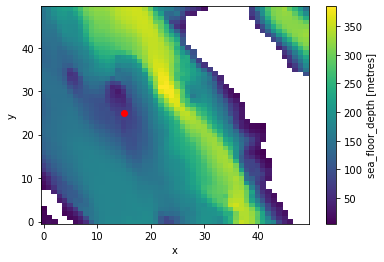

In [8]:
Bathy[600:650, 150:200].plot();
plt.plot(ptj-150, pti-600, 'ro');

In [9]:
bathy.close()

In [10]:
meshfile = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
deptht = meshfile.gdept_1d.values
meshfile.close()

## GRID T File

In [11]:
tracers = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV19-05')

In [12]:
time_slice_2018 = slice('2018-04-1 12:00:00', '2018-08-31 12:00:00', 24)
time_slice_2019 = slice('2019-04-1 12:00:00', '2019-08-31 12:00:00', 24)
time_slice_2020 = slice('2020-04-1 12:00:00', '2020-08-31 12:00:00', 24)

In [13]:
temp_2020 = tracers.temperature.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 3)).mean(axis=1)

In [14]:
temp_2018 = tracers.temperature.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 3)).mean(axis=1)

In [15]:
temp_2018['time2020'] = temp_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

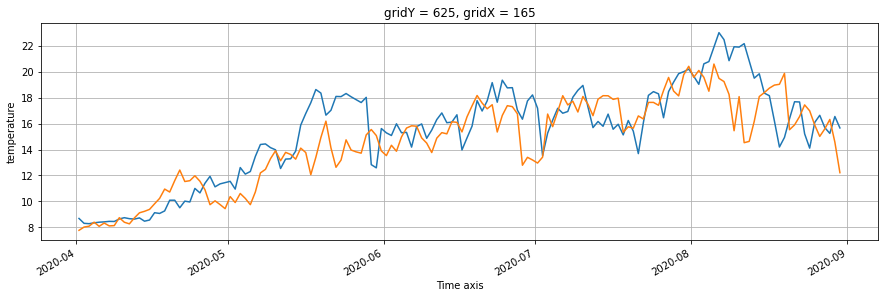

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(temp_2018.time2020, temp_2018)
temp_2020.plot(ax=ax)
ax.grid();

In [17]:
sal_2020 = tracers.salinity.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 3)).mean(axis=1)

In [18]:
sal_2018 = tracers.salinity.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 3)).mean(axis=1)

In [19]:
sal_2018['time2020'] = sal_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

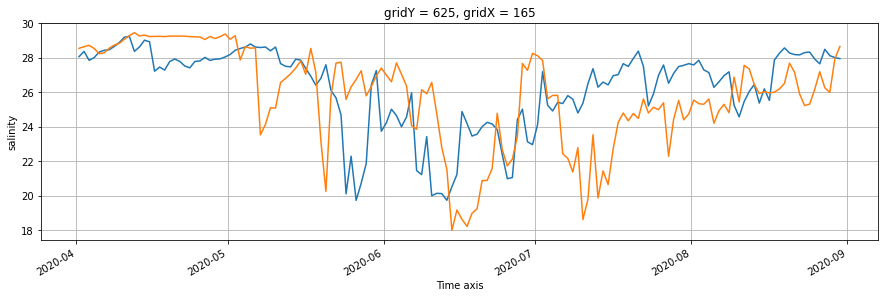

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(sal_2018.time2020, sal_2018)
sal_2020.plot(ax=ax)
ax.grid();

In [21]:
tracers.close()

## PTRC file

In [105]:
bio = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DBiologyFields1hV19-05')

In [107]:
1+2

3

In [23]:
nitrate_2020 = bio.nitrate.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 10)).mean(axis=1)

In [24]:
nitrate_2018 = bio.nitrate.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 10)).mean(axis=1)

In [25]:
nitrate_2018['time2020'] = nitrate_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

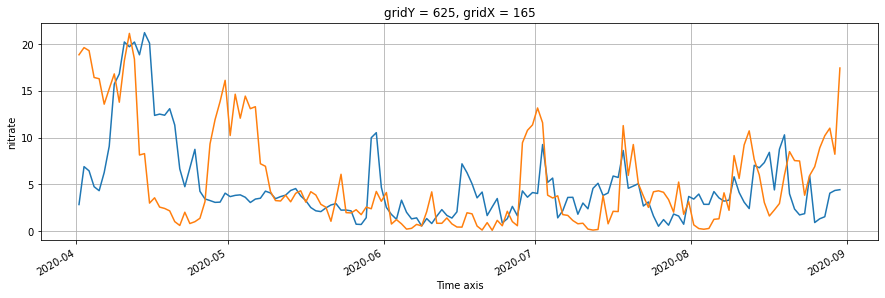

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(nitrate_2018.time2020, nitrate_2018)
ax.set_title('Nitrate')
nitrate_2020.plot(ax=ax)
ax.grid();

In [27]:
flag_2020 = bio.flagellates.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25)).mean(axis=1)

In [28]:
flag_2018 = bio.flagellates.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25)).mean(axis=1)
flag_2018['time2020'] = flag_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

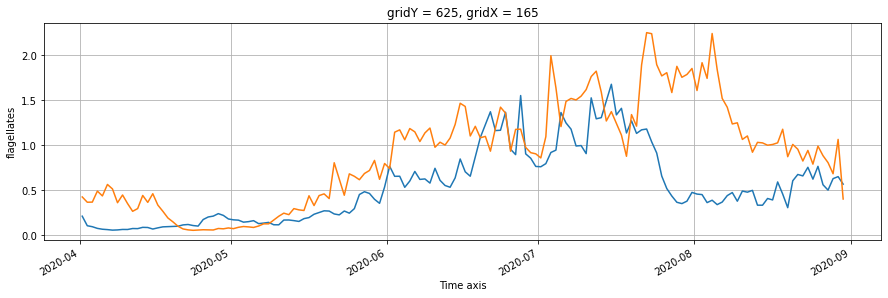

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(flag_2018.time2020, flag_2018)
ax.set_title('Flagellates')
flag_2020.plot(ax=ax)
ax.grid();

In [30]:
mzoo_2020 = bio.microzooplankton.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25)).mean(axis=1)

In [31]:
mzoo_2018 = bio.microzooplankton.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25)).mean(axis=1)
mzoo_2018['time2020'] = mzoo_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

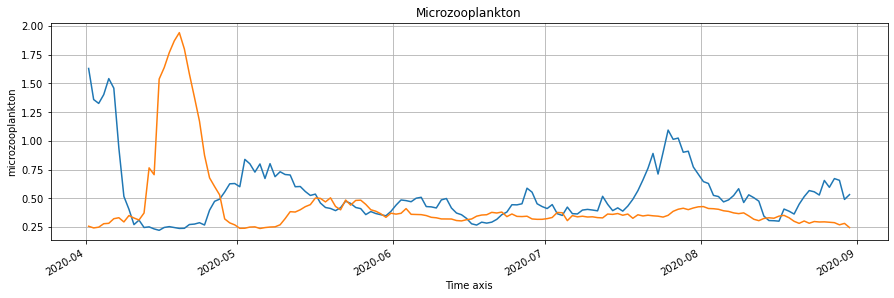

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(mzoo_2018.time2020, mzoo_2018)
mzoo_2020.plot(ax=ax)
ax.set_title("Microzooplankton")
ax.grid();

In [108]:
Meso_2020 = bio.mesozooplankton.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25)).mean(axis=1)

In [109]:
Meso_2018 = bio.mesozooplankton.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25)).mean(axis=1)
Meso_2018['time2020'] = Meso_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

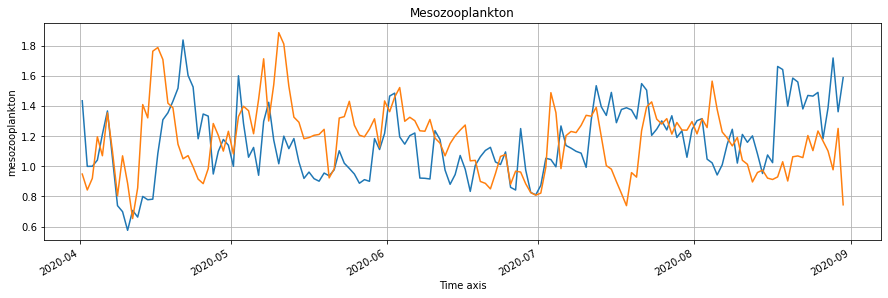

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(Meso_2018.time2020, Meso_2018)
Meso_2020.plot(ax=ax)
ax.set_title("Mesozooplankton")
ax.grid();

In [33]:
diat_2020 = bio.diatoms.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25)).mean(axis=1)

In [34]:
diat_2018 = bio.diatoms.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25)).mean(axis=1)
diat_2018['time2020'] = diat_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

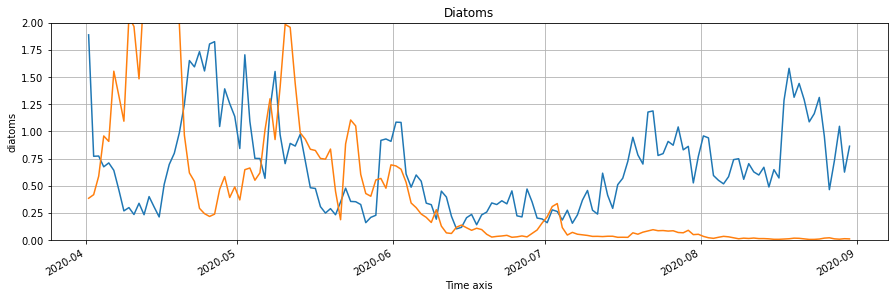

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(diat_2018.time2020, diat_2018)
diat_2020.plot(ax=ax)
ax.set_title('Diatoms')
ax.set_ylim(0, 2)
ax.grid();

In [36]:
bio.close()

## DIA file

In [37]:
directory = 'nowcast-green.201905'
dir_path = Path(f"/results2/SalishSea/{directory}")

In [38]:
drop_vars = [
    "time_centered",
    "time_centered_bounds",
    "time_counter_bounds",
    "nav_lat",
    "bounds_lat",
    "nav_lon",
    "bounds_lon",
    "area",
    "deptht_bounds",
]
chunks = {
    "time_counter": 1,
    "deptht": 1,
}

In [39]:
def prep_timeseries(dir_path, file_pattern, n_days): 
    ds_files = sorted(dir_path.glob(file_pattern))
    ds = xr.open_mfdataset(
        ds_files[:n_days],
        chunks=chunks,
        drop_variables=drop_vars,
    )
    timeseries = ds.isel(deptht = slice(20), y = pti, 
                             x = ptj).mean(axis=1)
    
    return timeseries

In [40]:
year = 2020
months_regex = '0[45678]'
file_pattern = f"*/SalishSea_1d_{year}{months_regex}*dia2_T*.nc"
timeseries = prep_timeseries(dir_path, file_pattern, -1)

In [41]:
timeseries

<xarray.Dataset>
Dimensions:         (time_counter: 152)
Dimensions without coordinates: time_counter
Data variables:
    bounds_nav_lon  (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    bounds_nav_lat  (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    HetMRub         (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    MORTPHY         (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    MORTMRUB        (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    MORTDIAT        (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMESZDIAT      (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMESZMRUB      (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMESZPHY       (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMESZPON       (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMESZMICZ      (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMICZDIAT      (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMICZMRUB      (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMICZPHY       (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMICZPON       (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMICZMICZ      (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>

In [42]:
timeseries.load(scheduler='processes', num_workers=4);

In [43]:
year = 2018
months_regex = '0[45678]'
file_pattern = f"*/SalishSea_1d_{year}{months_regex}*dia2_T*.nc"
timeseries_2018 = prep_timeseries(dir_path, file_pattern, -1)

In [44]:
timeseries_2018.load(scheduler='processes', num_workers=4);

In [45]:
timeseries.GRMESZDIAT.values/diat_2020.values

array([3.96567566e-06, 4.43608405e-06, 4.21236518e-06, 3.84069926e-06,
       4.24256541e-06, 3.30326861e-06, 3.49700190e-06, 3.18460070e-06,
       2.06531286e-06, 2.74853005e-06, 2.07719859e-06, 2.06477262e-06,
       1.78676805e-06, 1.55572138e-06, 1.76878086e-06, 1.88437343e-06,
       1.76826870e-06, 2.24297696e-06, 1.96786368e-06, 2.77689765e-06,
       2.80740551e-06, 2.71846716e-06, 2.86116119e-06, 3.37370034e-06,
       4.41450402e-06, 4.83082567e-06, 3.99240116e-06, 4.26821862e-06,
       5.13404393e-06, 5.18818206e-06, 8.28508382e-06, 5.91816433e-06,
       5.22603477e-06, 6.18400281e-06, 6.80998573e-06, 5.34320816e-06,
       6.47131583e-06, 6.15842282e-06, 3.96570204e-06, 3.51338372e-06,
       3.43489864e-06, 4.26077395e-06, 5.19743162e-06, 4.82820906e-06,
       4.28750127e-06, 3.78412460e-06, 3.74932847e-06, 4.41311931e-06,
       3.53358064e-06, 4.67708514e-06, 7.24788742e-06, 4.38154120e-06,
       4.71137628e-06, 4.69992074e-06, 5.53865266e-06, 6.17225169e-06,
      

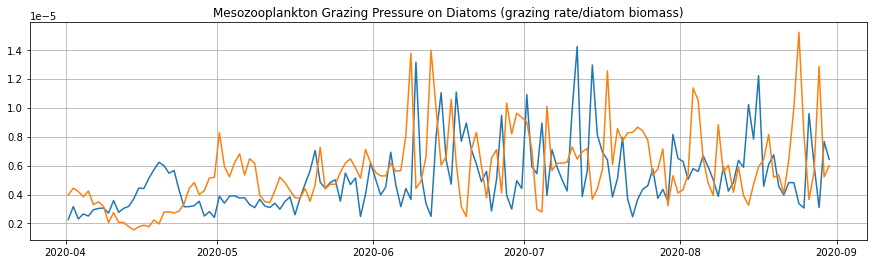

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(diat_2018.time2020, timeseries_2018.GRMESZDIAT.values/diat_2018.values)
ax.plot(diat_2020.time, timeseries.GRMESZDIAT.values/diat_2020.values)
ax.set_title('Mesozooplankton Grazing Pressure on Diatoms (grazing rate/diatom biomass)')
ax.grid();

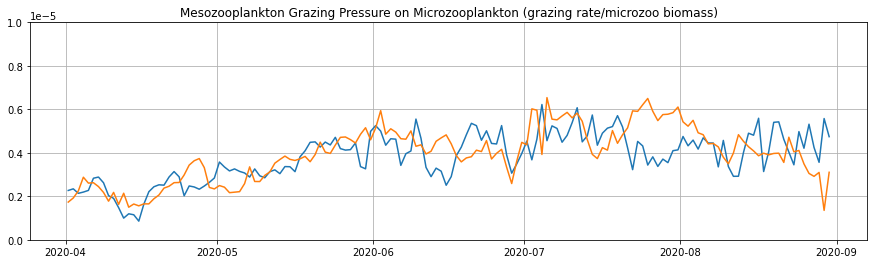

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(mzoo_2018.time2020, timeseries_2018.GRMESZMICZ.values/mzoo_2018.values)
ax.plot(mzoo_2020.time, timeseries.GRMESZMICZ.values/mzoo_2020.values)
ax.set_title('Mesozooplankton Grazing Pressure on Microzooplankton (grazing rate/microzoo biomass)')
ax.set_ylim(0, 1e-5)
ax.grid();

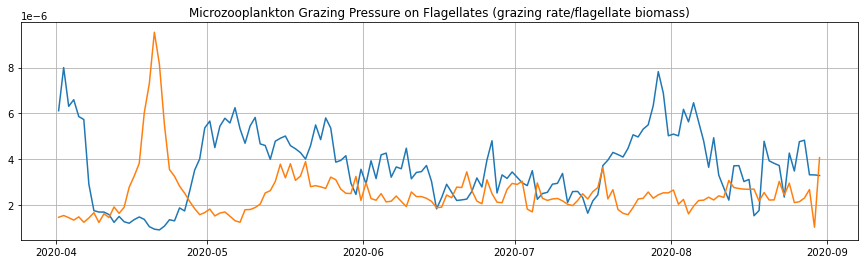

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(flag_2018.time2020, timeseries_2018.GRMICZPHY.values/flag_2018.values)
ax.plot(flag_2020.time, timeseries.GRMICZPHY.values/flag_2020.values)
ax.set_title('Microzooplankton Grazing Pressure on Flagellates (grazing rate/flagellate biomass)')
#ax.set_ylim(0, 1e-4)
ax.grid();

In [49]:
timeseries

<xarray.Dataset>
Dimensions:         (time_counter: 152)
Dimensions without coordinates: time_counter
Data variables:
    bounds_nav_lon  (time_counter) float32 -124.6 -124.6 ... -124.6 -124.6
    bounds_nav_lat  (time_counter) float32 49.64 49.64 49.64 ... 49.64 49.64
    HetMRub         (time_counter) float32 1.101e-08 1.187e-08 ... 3.082e-08
    MORTPHY         (time_counter) float32 9.125e-08 8.724e-08 ... 2.514e-07
    MORTMRUB        (time_counter) float32 4.555e-08 5.022e-08 ... 5.805e-08
    MORTDIAT        (time_counter) float32 1.279e-07 1.633e-07 ... 3.909e-09
    GRMESZDIAT      (time_counter) float32 1.529e-06 1.858e-06 ... 7.117e-08
    GRMESZMRUB      (time_counter) float32 2.585e-07 2.79e-07 ... 4.041e-07
    GRMESZPHY       (time_counter) float32 5.613e-07 5.004e-07 ... 2.516e-06
    GRMESZPON       (time_counter) float32 3.895e-07 3.062e-07 ... 1.216e-06
    GRMESZMICZ      (time_counter) float32 4.449e-07 4.654e-07 ... 7.603e-07
    GRMICZDIAT      (time_counter) float32 5.634e-07 6.793e-07 ... 0.0 0.0
    GRMICZMRUB      (time_counter) float32 1.832e-11 8.106e-09 ... 0.0 2.644e-11
    GRMICZPHY       (time_counter) float32 6.204e-07 5.63e-07 ... 1.631e-06
    GRMICZPON       (time_counter) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 8.794e-09
    GRMICZMICZ      (time_counter) float32 2.132e-07 2.001e-07 ... 3.076e-07

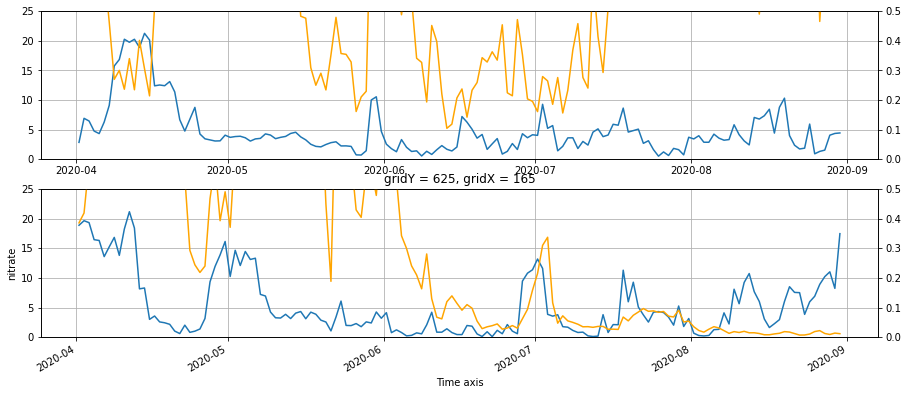

In [50]:
fig, axs = plt.subplots(2, 1, figsize=(15, 6))
axs[0].plot(nitrate_2018.time2020, nitrate_2018)
ax0 = axs[0].twinx()
ax1 = axs[1].twinx()
nitrate_2020.plot(ax=axs[1])
ax0.plot(diat_2018.time2020, diat_2018,  color='orange')
ax1.plot(diat_2020.time, diat_2020, color='orange')
for ax in axs:
    ax.grid();
    ax.set_ylim(0, 25)
for ax in [ax0, ax1]:
    ax.set_ylim(0, 0.5)

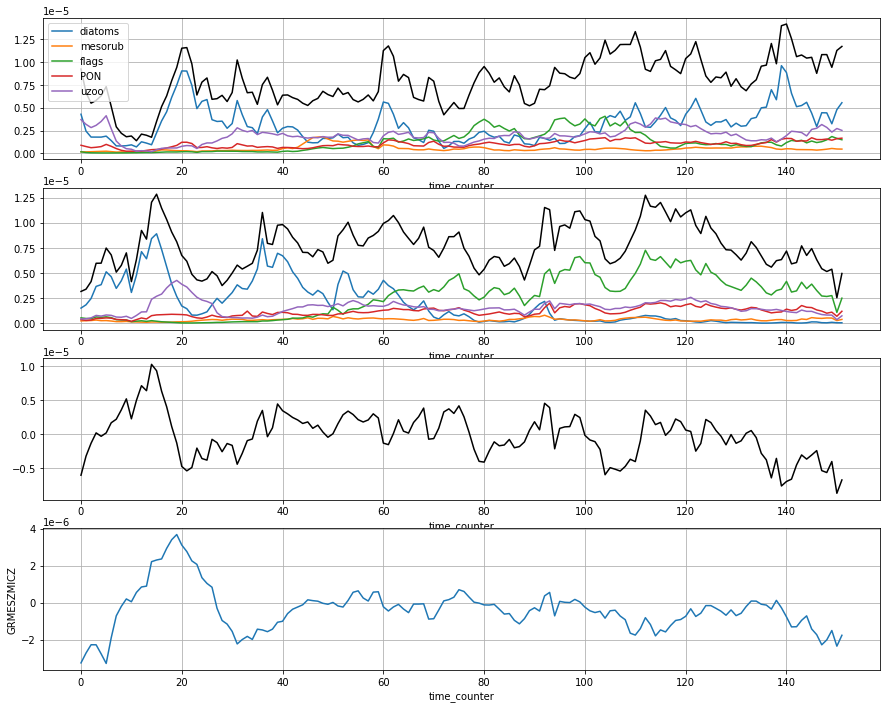

In [104]:
fig, axs = plt.subplots(4, 1, figsize=(15, 12))
timeseries_2018.GRMESZDIAT.plot(ax=axs[0], label='diatoms')
timeseries_2018.GRMESZMRUB.plot(ax=axs[0], label='mesorub')
timeseries_2018.GRMESZPHY.plot(ax=axs[0], label='flags')
timeseries_2018.GRMESZPON.plot(ax=axs[0], label='PON')
timeseries_2018.GRMESZMICZ.plot(ax=axs[0], label='uzoo')
(timeseries_2018.GRMESZDIAT + timeseries_2018.GRMESZMRUB + timeseries_2018.GRMESZPHY + timeseries_2018.GRMESZPON 
 + timeseries_2018.GRMESZMICZ).plot(ax=axs[0], color='k')
timeseries.GRMESZDIAT.plot(ax=axs[1])
timeseries.GRMESZMRUB.plot(ax=axs[1])
timeseries.GRMESZPHY.plot(ax=axs[1])
timeseries.GRMESZPON.plot(ax=axs[1])
timeseries.GRMESZMICZ.plot(ax=axs[1])
(timeseries.GRMESZDIAT + timeseries.GRMESZMRUB + timeseries.GRMESZPHY + timeseries.GRMESZPON 
 + timeseries.GRMESZMICZ).plot(ax=axs[1], color='k')
(timeseries.GRMESZDIAT + timeseries.GRMESZMRUB + timeseries.GRMESZPHY + timeseries.GRMESZPON 
 + timeseries.GRMESZMICZ - (timeseries_2018.GRMESZDIAT + timeseries_2018.GRMESZMRUB 
                            + timeseries_2018.GRMESZPHY + timeseries_2018.GRMESZPON
 + timeseries_2018.GRMESZMICZ)).plot(ax=axs[2], color='k')
(timeseries.GRMESZMICZ - timeseries_2018.GRMESZMICZ).plot(ax=axs[3])
axs[0].legend();
for ax in axs:
    ax.grid();

In [111]:
auxds = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DAuxiliaryFields1hV19-05')

In [53]:
time_noon_2018 = slice('2018-04-1 20:00:00', '2018-08-31 20:00:00', 24)
time_noon_2020 = slice('2020-04-1 20:00:00', '2020-08-31 20:00:00', 24)

In [54]:
par_2020 = auxds.PAR.isel(
    gridY=pti, gridX=ptj).sel(
    time=time_noon_2020).isel(depth=1)

In [55]:
par_2018 = auxds.PAR.isel(
    gridY=pti, gridX=ptj).sel(
    time=time_noon_2018).isel(depth=1)

In [56]:
par_2018['time2020'] = par_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

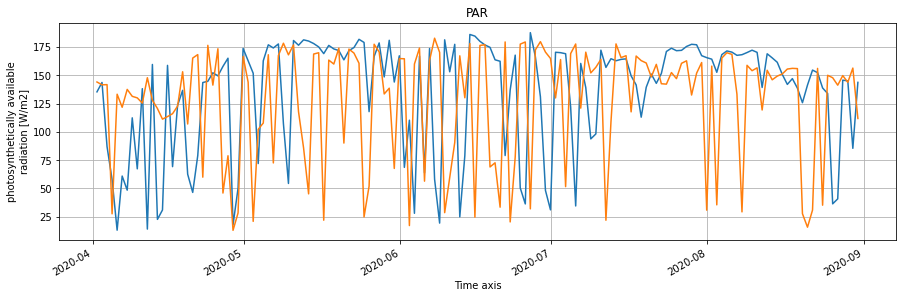

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(par_2018.time2020, par_2018)
par_2020.plot(ax=ax)
ax.set_title('PAR')
#ax.set_ylim(0, 1)
ax.grid();

In [58]:
par_2018[(par_2018.time >= np.datetime64(dt.datetime(2018, 6, 1))) & 
         (par_2018.time <= np.datetime64(dt.datetime(2018, 7, 1)))].sum()

<xarray.DataArray 'PAR' ()>
array(3567.2014, dtype=float32)
Coordinates:
    depth    float32 1.5
    gridY    int16 625
    gridX    int16 165

In [59]:
par_2020[(par_2020.time >= np.datetime64(dt.datetime(2020, 6, 1))) & 
         (par_2020.time <= np.datetime64(dt.datetime(2020, 7, 1)))].sum()

<xarray.DataArray 'PAR' ()>
array(3649.3154, dtype=float32)
Coordinates:
    depth    float32 1.5
    gridY    int16 625
    gridX    int16 165

In [112]:
par_2018[(par_2018.time >= np.datetime64(dt.datetime(2018, 5, 1))) & 
         (par_2018.time <= np.datetime64(dt.datetime(2018, 6, 1)))].sum().values

array(4976.982, dtype=float32)

In [114]:
par_2020[(par_2020.time >= np.datetime64(dt.datetime(2020, 5, 1))) & 
         (par_2020.time <= np.datetime64(dt.datetime(2020, 6, 1)))].sum().values

array(3935.22, dtype=float32)

In [60]:
auxds.close()

In [61]:
diat_2018 = bio.diatoms.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25))
diat_2018['time2020'] = diat_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

In [62]:
diat_2020 = bio.diatoms.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25))


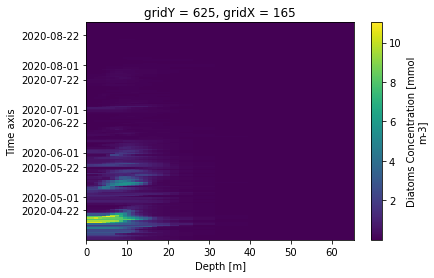

In [63]:
diat_2020.plot()

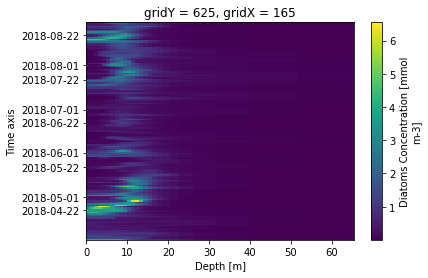

In [64]:
diat_2018.plot()

In [65]:
nitrate_2020 = bio.nitrate.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25))


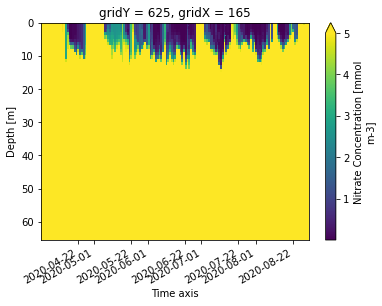

In [66]:
nitrate_2020.transpose().plot(yincrease=False, vmax=5);

In [67]:
nitrate_2018 = bio.nitrate.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25))
nitrate_2018['time2020'] = nitrate_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

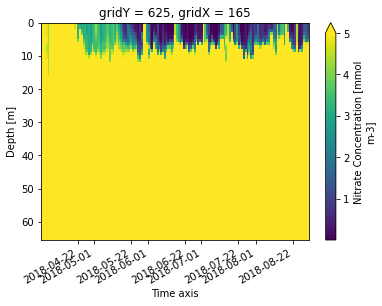

In [68]:
nitrate_2018.transpose().plot(yincrease=False, vmax=5);

In [69]:
nitrate_2020.load()

<xarray.DataArray 'nitrate' (time: 152, depth: 25)>
array([[18.839142 , 18.840645 , 18.843649 , ..., 26.190142 , 26.6731   ,
        26.998657 ],
       [19.20503  , 19.20534  , 19.20669  , ..., 26.428198 , 26.810785 ,
        26.981323 ],
       [19.180601 , 19.181715 , 19.183882 , ..., 26.539835 , 26.903038 ,
        27.076767 ],
       ...,
       [ 4.7292314,  5.2755785,  6.9337616, ..., 23.88575  , 26.124083 ,
        27.604168 ],
       [ 8.211314 ,  8.212502 ,  8.214789 , ..., 23.791134 , 26.246796 ,
        27.67861  ],
       [17.323559 , 17.325024 , 17.327747 , ..., 24.589369 , 25.69603  ,
        27.637854 ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-04-01T12:30:00 ... 2020-08-30T12:30:00
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 28.23 34.69 44.52 58.48
    gridY    int16 625
    gridX    int16 165
Attributes:
    _ChunkSizes:            [  1  40 898 398]
    colorBarMaximum:        40.0
    colorBarMinimum:        0.0
    coverage_content_type:  modelResult
    ioos_category:          dissolved_nutrients
    long_name:              Nitrate Concentration
    standard_name:          mole_concentration_of_nitrate_in_sea_water
    units:                  mmol m-3

In [70]:
nitrate_2018.load()

<xarray.DataArray 'nitrate' (time: 152, depth: 25)>
array([[ 2.1815648 ,  2.1848447 ,  2.1911922 , ..., 25.820814  ,
        26.298199  , 26.632067  ],
       [ 6.8905654 ,  6.8916607 ,  6.893848  , ..., 26.01875   ,
        26.326508  , 26.630682  ],
       [ 7.1574135 ,  7.154973  ,  7.1504493 , ..., 26.06921   ,
        26.352592  , 26.545322  ],
       ...,
       [ 1.279987  ,  1.2860568 ,  1.3708261 , ..., 25.879354  ,
        26.80634   , 27.223372  ],
       [ 1.5250388 ,  1.5268728 ,  1.5317309 , ..., 26.618319  ,
        26.819822  , 27.185932  ],
       [ 0.8209557 ,  0.827284  ,  0.90417844, ..., 25.522831  ,
        26.605158  , 26.826815  ]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 2018-04-01T12:30:00 ... 2018-08-30T12:30:00
  * depth     (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 28.23 34.69 44.52 58.48
    gridY     int16 625
    gridX     int16 165
    time2020  (time) datetime64[ns] 2020-04-01T12:30:00 ... 2020-08-30T12:30:00
Attributes:
    _ChunkSizes:            [  1  40 898 398]
    colorBarMaximum:        40.0
    colorBarMinimum:        0.0
    coverage_content_type:  modelResult
    ioos_category:          dissolved_nutrients
    long_name:              Nitrate Concentration
    standard_name:          mole_concentration_of_nitrate_in_sea_water
    units:                  mmol m-3

In [71]:
nitrate_2020.values-nitrate_2018.values

array([[16.657578  , 16.6558    , 16.652456  , ...,  0.36932755,
         0.37490082,  0.3665905 ],
       [12.314465  , 12.313679  , 12.312841  , ...,  0.40944862,
         0.48427773,  0.35064125],
       [12.023188  , 12.026742  , 12.033432  , ...,  0.47062492,
         0.55044556,  0.53144455],
       ...,
       [ 3.4492445 ,  3.9895217 ,  5.5629354 , ..., -1.9936047 ,
        -0.6822567 ,  0.38079643],
       [ 6.6862755 ,  6.685629  ,  6.6830587 , ..., -2.8271847 ,
        -0.57302666,  0.4926777 ],
       [16.502604  , 16.49774   , 16.423569  , ..., -0.93346214,
        -0.9091282 ,  0.811039  ]], dtype=float32)

<ipython-input-86-fea61c862923>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = ax.pcolormesh(nitrate_2018.time2020, deptht[0, 0:25], (nitrate_2020.values-nitrate_2018.values


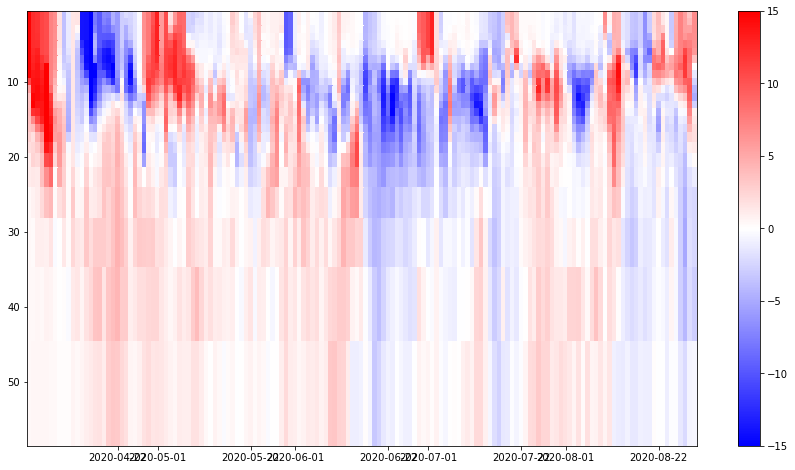

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colours = ax.pcolormesh(nitrate_2018.time2020, deptht[0, 0:25], (nitrate_2020.values-nitrate_2018.values
                                                                ).transpose(), cmap='bwr', vmax=15, vmin=-15)
fig.colorbar(colours);
ax.invert_yaxis();

<ipython-input-90-69745873328f>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = ax.pcolormesh(diat_2018.time2020, deptht[0, 0:25],


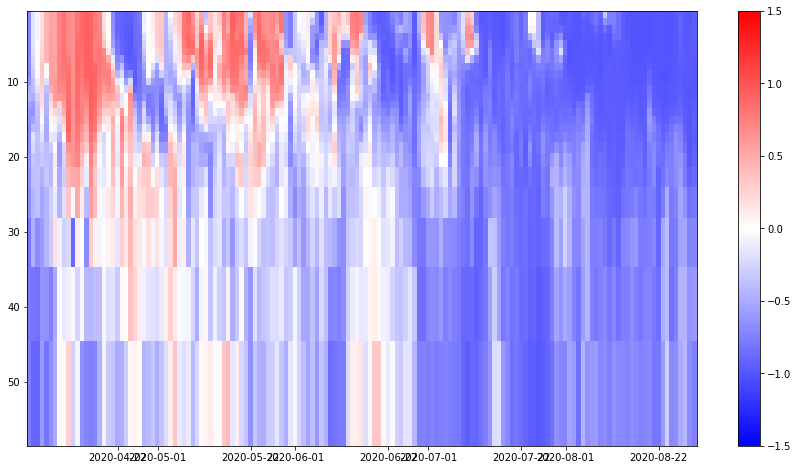

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colours = ax.pcolormesh(diat_2018.time2020, deptht[0, 0:25], 
                        ((diat_2020.values-diat_2018.values)/
                         (diat_2020.values+diat_2018.values)).transpose(), cmap='bwr', vmax=1.5, vmin=-1.5)
fig.colorbar(colours);
ax.invert_yaxis();

In [74]:
sal_2020 = tracers.salinity.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25))

In [75]:
sal_2018 = tracers.salinity.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25))

In [76]:
sal_2018['time2020'] = sal_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

<ipython-input-91-aee5a8f520e0>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = ax.pcolormesh(sal_2018.time2020, deptht[0, 0:25], (sal_2020.values-sal_2018.values).transpose(),


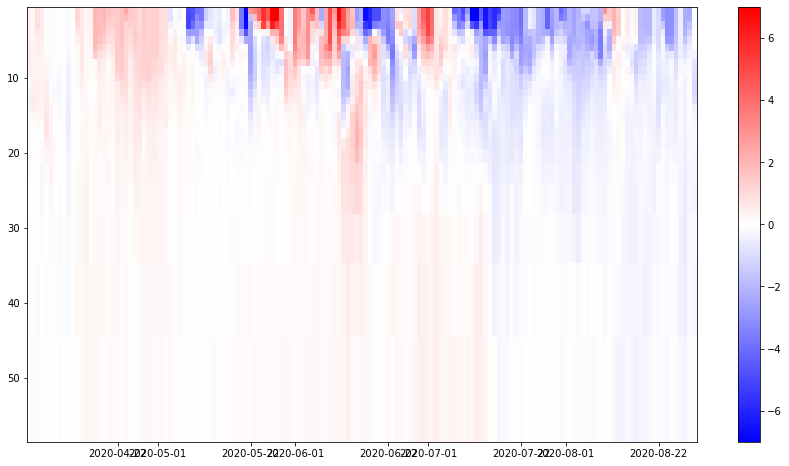

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colours = ax.pcolormesh(sal_2018.time2020, deptht[0, 0:25], (sal_2020.values-sal_2018.values).transpose(), 
                        cmap='bwr', vmax=7, vmin=-7)
fig.colorbar(colours);
ax.invert_yaxis();

In [78]:
flag_2018 = bio.flagellates.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25))
flag_2018['time2020'] = flag_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

In [79]:
flag_2020 = bio.flagellates.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25))

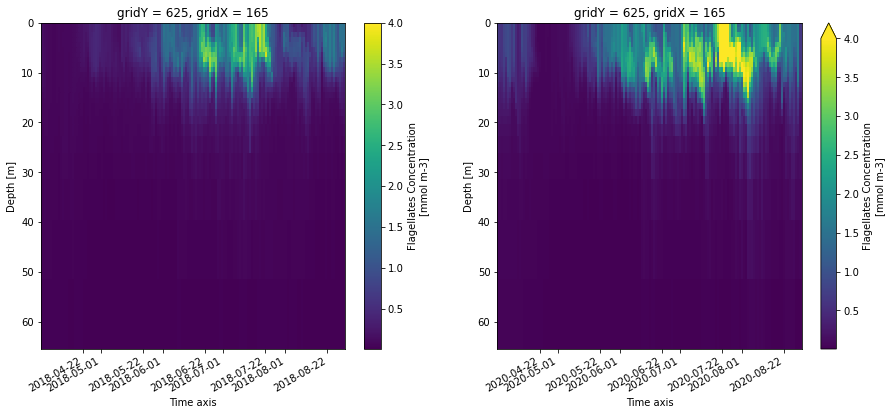

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
flag_2018.transpose().plot(yincrease=False, ax=axs[0], vmax=4);
flag_2020.transpose().plot(yincrease=False, ax=axs[1], vmax=4);

In [81]:
mzoo_2018 = bio.microzooplankton.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25))
mzoo_2018['time2020'] = mzoo_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

In [82]:
mzoo_2020 = bio.microzooplankton.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25))

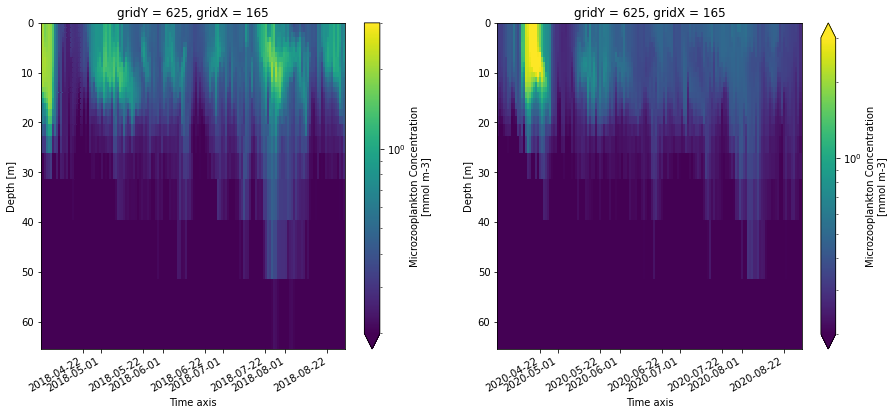

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
mzoo_2018.transpose().plot(yincrease=False, ax=axs[0], norm=colors.LogNorm(vmax=3, vmin=0.2));
mzoo_2020.transpose().plot(yincrease=False, ax=axs[1], norm=colors.LogNorm(vmax=3, vmin=0.2));

<ipython-input-93-c80fde300dec>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = ax.pcolormesh(mzoo_2018.time2020, deptht[0, 0:25], (mzoo_2020.values-mzoo_2018.values).transpose(),


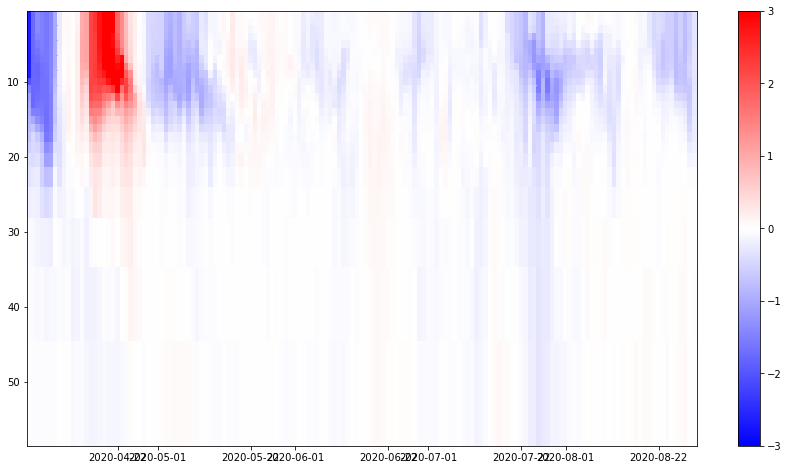

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colours = ax.pcolormesh(mzoo_2018.time2020, deptht[0, 0:25], (mzoo_2020.values-mzoo_2018.values).transpose(), 
                        cmap='bwr', vmax=3, vmin=-3)
fig.colorbar(colours);
ax.invert_yaxis();

<ipython-input-94-1bdd30ceff38>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = ax.pcolormesh(flag_2018.time2020, deptht[0, 0:25], (flag_2020.values-flag_2018.values).transpose(),


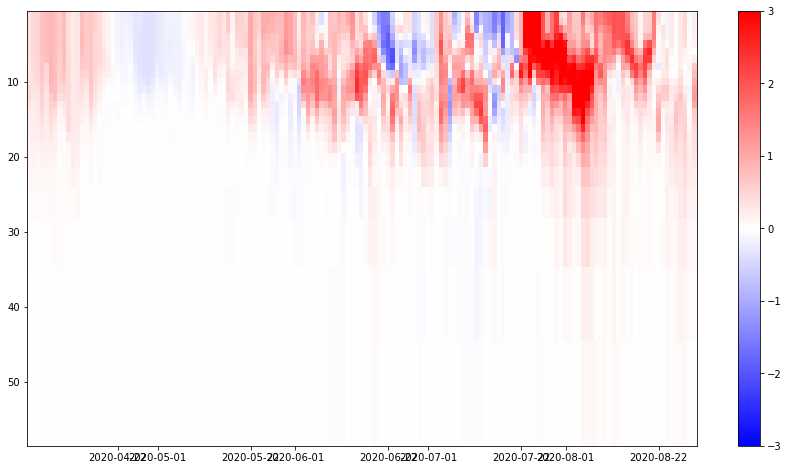

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colours = ax.pcolormesh(flag_2018.time2020, deptht[0, 0:25], (flag_2020.values-flag_2018.values).transpose(), 
                        cmap='bwr', vmax=3, vmin=-3)
fig.colorbar(colours);
ax.invert_yaxis();

<ipython-input-102-64ee8a919402>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = ax.pcolormesh(mzoo_2018.time2020, deptht[0, 0:25], (mzoo_2020.values/flag_2020.values -


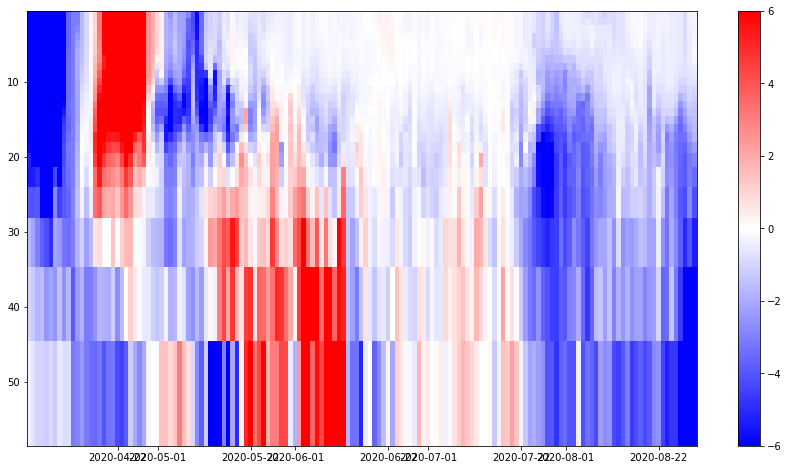

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colours = ax.pcolormesh(mzoo_2018.time2020, deptht[0, 0:25], (mzoo_2020.values/flag_2020.values - 
                                                              mzoo_2018.values/flag_2018.values).transpose(), 
                        cmap='bwr', vmax=6, vmin=-6)
fig.colorbar(colours);
ax.invert_yaxis();